In [1]:
using Pkg;
Pkg.activate("../");

using PyCall;
pygui(:tk);

  Activating project at `d:\GitHub\book-dp1`


In [2]:
using LinearAlgebra

α, λ, d, b = 0.01, 0.1, 0.02, 0.025
g = b - d
A = [(1 - d) * (1 - λ) + b    (1 - d) * α + b;
     (1 - d) * λ              (1 - d) * (1 - α)]

ū = (1 + g - (1 - d) * (1 - α)) /  
        (1 + g - (1 - d) * (1 - α) + (1 - d) * λ)

ē = 1 - ū
x̄ = [ū; ē]

println(isapprox(A * x̄, (1 + g) * x̄))   # prints true

# == Plots == #
using PyPlot
using LaTeXStrings
PyPlot.matplotlib[:rc]("text", usetex=true) # allow tex rendering
fontsize=14



function plot_paths(; figname="../figures/lake_1.pdf", 
                      savefig=false)
    path_length = 100
    x_path_1 = zeros(2, path_length)
    x_path_2 = zeros(2, path_length)
    x_0_1 = 5.0, 0.1
    x_0_2 = 0.1, 4.0
    x_path_1[1, 1] = x_0_1[1]
    x_path_1[2, 1] = x_0_1[2]
    x_path_2[1, 1] = x_0_2[1]
    x_path_2[2, 1] = x_0_2[2]


    for t in 1:(path_length-1)
        x_path_1[:, t+1] = A * x_path_1[:, t]
        x_path_2[:, t+1] = A * x_path_2[:, t]
    end

    fig, ax = plt.subplots()

    # Set the axes through the origin
    for spine in ["left", "bottom"]
        ax.spines[spine].set_position("zero")
    end
    for spine in ["right", "top"]
        ax.spines[spine].set_color("none")
    end

    ax.set_xlim(0, 6)
    ax.set_ylim(0, 6)
    ax.set_xlabel("unemployed workforce", fontsize=fontsize)
    ax.set_ylabel("employed workforce", fontsize=fontsize)
    ax.set_xticks((0, 6))
    ax.set_yticks((0, 6))
    s = 10
    ax.plot([0, s * ū], [0, s * ē], "k--", lw=1)
    ax.scatter(x_path_1[1, :], x_path_1[2, :], s=4, c="blue")
    ax.scatter(x_path_2[1, :], x_path_2[2, :], s=4, c="green")

    ax.plot([ū], [ē], "ko", ms=4, alpha=0.6)
    ax.annotate(L"\bar x", 
             xy=(ū, ē),
             xycoords="data",
             xytext=(20, -20),
             textcoords="offset points",
             fontsize=fontsize,
             arrowprops=Dict("arrowstyle" => "->"))

    x, y = x_0_1[1], x_0_1[2]
    lb = latexstring("\$x_0 = ($(x), $(y))\$")
    ax.plot([x], [y], "ko", ms=2, alpha=0.6)
    ax.annotate(lb, 
                xy=(x, y),
             xycoords="data",
             xytext=(0, 20),
             textcoords="offset points",
             fontsize=fontsize,
             arrowprops=Dict("arrowstyle" => "->"))

    x, y = x_0_2[1], x_0_2[2]
    lb = latexstring("\$x_0 = ($(x), $(y))\$")
    ax.plot([x], [y], "ko", ms=2, alpha=0.6)
    ax.annotate(lb, 
                xy=(x, y),
             xycoords="data",
             xytext=(0, 20),
             textcoords="offset points",
             fontsize=fontsize,
             arrowprops=Dict("arrowstyle" => "->"))

    if savefig
        fig.savefig(figname)
    end
end


function plot_growth(; savefig=false, figname="../figures/lake_2.pdf")


    path_length = 100
    x_0 = 2.1, 1.2
    x = zeros(2, path_length)
    x[1, 1] = 0.6 
    x[2, 1] = 1.2

    for t in 1:(path_length-1)
        x[:, t+1] = A * x[:, t]
    end

    fig, axes = plt.subplots(3, 1)
    u = x[1, :]
    e = x[2, :]
    n = x[1, :] .+ x[2, :]
    paths = u, e, n
    labels = L"u_t", L"e_t", L"n_t"
    for (ax, path, label) in zip(axes, paths, labels)
        ax.plot(path, label=label)
        ax.legend(frameon=false, fontsize=14)
        ax.set_xlabel(L"t")
    end

    plt.tight_layout()
    if savefig
        fig.savefig(figname)
    end

end

true

plot_growth (generic function with 1 method)

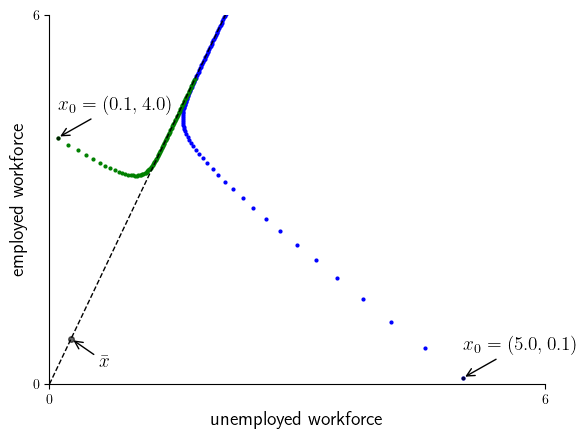

In [3]:
plot_paths(savefig=true)

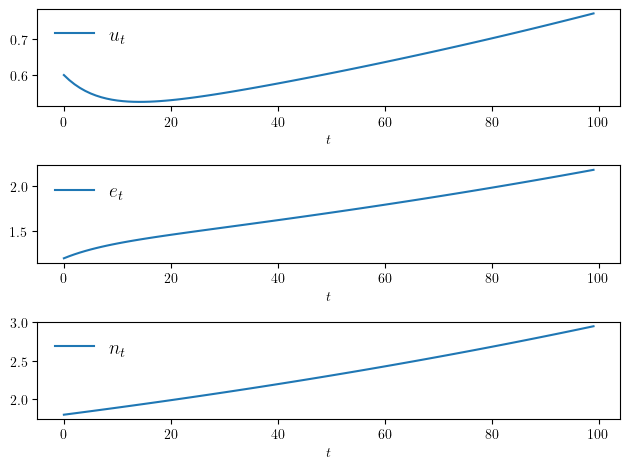

In [4]:
plot_growth(savefig=true)